In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import nltk
from textblob import TextBlob

In [3]:
df = pd.read_csv('/Users/jralston/git_proj/Scrapy_project_yelp/yelp/yelp_indian.csv')

In [4]:
df.head()

address       date price  rating  restaurant  \
0  27 W 24th St, New York, NY 10010   7/6/2012   $$$       4      Junoon   
1  27 W 24th St, New York, NY 10010   1/6/2012   $$$       5      Junoon   
2  27 W 24th St, New York, NY 10010  2/13/2012   $$$       2      Junoon   
3  320 Park Ave, New York, NY 10020  7/14/2011    $$       1  Just Salad   
4  320 Park Ave, New York, NY 10020  3/19/2014    $$       2  Just Salad   

                                                text  
0  Very pleased with my gdine purchase and great ...  
1  so.....amazing!!  this is the best indian food...  
2  We went to Junoon expecting a Michelin starred...  
3  This place is so cheap with the toppings!  The...  
4  I love the salads here. The quality of product...

In [5]:
df.shape

(54566, 6)

In [6]:
df.groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False).shape

(172, 3)

In [7]:
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import Figure, Histogram, Layout

min_ = 0
max_ = 5

data = [Histogram(x=df.rating, 
                  xbins=dict(start=min_,
                             end=max_,
                             size=0.99))]
layout = Layout(title="Histogram of Yelp Rating",
                bargap=0.2)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [9]:
df['polarity'] = df.text.apply(lambda x: TextBlob(x).sentiment.polarity)

In [11]:
# print('\n'.join(list(df[df.polarity < -0.8].text)))
# print('\n'.join(list(df[df.polarity == 1].text)))

In [12]:
min_ = df.polarity.min()
max_ = df.polarity.max()

data = [Histogram(x=df.polarity, 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/10))]
layout = Layout(title="Histogram of Polarity",
                bargap=0.2)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

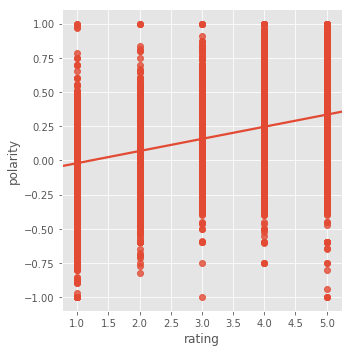

In [13]:
sns.lmplot("rating", "polarity", df)

In [14]:
#restrict to Dhaba
df = df[df.restaurant == 'Dhaba Indian Cuisine']

#just grab rating and review text
df = df[['rating', 'text']]

#switch to lower case
df.text = df.text.apply(lambda x: x.lower())

In [15]:
sample_menu = ['mulligatawny', 'pakora', 'batata vada', 'chilli masala',
               'samosa', 'kaju', 'paneer pakora', 'baingan',
               'bhindi', 'lasuni gobi', 'savera', 'malai wai', 
               'taash kabab', 'kalmi kabab', 'tangri kabab', 'reshmi',
               'murgh kabab', 'mustard chicken tikka', 'fish amritsari',
               'luchi', 'chapli kabab', 'vada pao', 'pab bhaji',
               'chili pao', 'khurchan pao', 'keema pao',
               'bhel poori', 'batata sev poori', 'pani poori',
               'papri chaat', 'aloo tikki chaat', 'samosa chaat',
               'chole batura', 'murgh', 'murgh tandoor', 'murgh tikka',
               'malai kabab', 'seekh kabab', 'malai kabab', 'jhinga',
               'andrak', 'mixed grill', 'biryani', 'pulav', 'pulao',
               'lemon rice', 'ghee rice', 'vegan', 'wadi', 'saag',
               'bharta', 'kofta', 'mutter', 'marke paneeer', 'kali mirch',
               'saag paneer', 'saag malai', 'kadhi', 'bhindi', 'korma',
               'murgh', 'punjab murgh', 'methi murgh', 'bharta',
               'chutneywala', 'kali murch', 'butter murgh',
               'chicken tikka masala', 'murgh dahiwala', 'keema',
               'rogan josh', 'lamb dhansak', 'bhindi gosht',
               'dhaba goat curry', 'gao fish', 'patiala', 'sarson',
               'shrimp curry', 'shrimp tikka', 'roomali',
               'naan', 'garlic naan', 'onion naan', 'paneer cheese',
               'nut naan', 'kulcha', 'paratha', 'aloo paratha',
               'gobi paratha', 'tandoori roti', 'roti', 'maaki',
               'poori', 'balti', 'phaal', 'madras', 'piaza', 'kadai',
               'bhuna', 'vindaloo', 'balchao', 'korma', 'saag',
               'jalfrezi', 'achari', 'langarwali daal', 'daal tadka',
               'daal', 'ki daal', 'dhaba daal', 'rajma',
               'pickels', 'papad', 'mango chutney', 'raita',
              'chicken', 'goat', 'lamb', 'fish', 'shrimp', 'mango lassi']

sample_menu = list(set(sample_menu))

## Dish Reviews Based on Yelp Review

In [ ]:
# this returns just those reviews that have the word
# in the text of the review
def subset_reviews(word, df):
    return df[df.text.str.contains(word)]

# return avg rating of revies that contain dish
def avg_review_of_dish(item, df):
    return subset_reviews(item, df).mean()

# return nuber of times dishes reviewed
def dish_count(item, df):
    return subset_reviews(item, df).shape[0]

In [ ]:
# create the dish review dataframe
dish_ratings = [avg_review_of_dish(item, df)[0] for item in sample_menu]
dish_counts = [dish_count(item, df) for item in sample_menu]
data = {'dish' : sample_menu,
       'rating' : dish_ratings,
       'times_reviewed': dish_counts}
dish_df = pd.DataFrame(data)

In [ ]:
# dish review dataframe
dish_df[dish_df.times_reviewed > 9].sort_values(by = 'rating', ascending=False)

## Dish Review Based on Sentiment of Yelp Review

In [ ]:
# create sentiment df which is text, polarity of text

from textblob import TextBlob
df_sentiment = df[['text']]
df_sentiment.text = df_sentiment.text.apply(lambda x: x.lower())
df_sentiment['polarity'] = df_sentiment.text.apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# create the dish review dataframe
dish_ratings = [avg_review_of_dish(item, df_sentiment)[0] for item in sample_menu]
dish_counts = [dish_count(item, df_sentiment) for item in sample_menu]
data = {'dish' : sample_menu,
       'rating' : dish_ratings,
       'times_reviewed': dish_counts}
dish_sentiment_df = pd.DataFrame(data)

dish_sentiment_df[dish_sentiment_df.times_reviewed > 9].\
sort_values(by = 'rating', ascending=False)

# Dish Review Based on Sentiment of Yelp Sentence

### First need to split reviews into sentences

In [ ]:
# split the reviews into sentecnes
reviews_sentences = ''.join(list(df.text)).split('.')

# create a dataframe with these sentences
data = {'text' : reviews_sentences}
sentences_df = pd.DataFrame(data)
sentences_df.text = sentences_df.text.apply(lambda x: x.lower())

# create column which is polarity of text
from textblob import TextBlob
sentences_df['polarity'] = sentences_df.text.apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
list(subset_reviews('chicken tikka masala', sentences_df).text);
list(subset_reviews('vegan', sentences_df).text);

In [ ]:
# create the dish review dataframe
dish_ratings = [avg_review_of_dish(item, sentences_df)[0] for item in sample_menu]
dish_counts = [dish_count(item, sentences_df) for item in sample_menu]
data = {'dish' : sample_menu,
       'rating' : dish_ratings,
       'times_mentioned': dish_counts}
sentences_df = pd.DataFrame(data)

In [ ]:
sentences_df[sentences_df.times_mentioned > 9].\
sort_values(by = 'rating', ascending=False)

# Model sentiment from dish and pick best dish

## Restrict Menu to only dishes mentioned at least 10 times

In [ ]:
restricted_menu = ['mulligatawny', 'vegan', 'keema', 'mango lassi', 'bhindi', 'kadai',
                   'goat', 'onion naan', 'garlic naan', 'naan', 'papad', 'paratha',
                   'fish', 'phaal', 'pakora', 'samosa', 'balchao', 'saag', 'shrimp',
                   'saag paneer', 'poori', 'daal', 'raita', 'lamb', 'kofta', 'korma',
                   'madras', 'biryani', 'roti', 'roomali', 'murgh', 'shrimp curry',
                   'vindaloo', 'rogan josh', 'mutter', 'kali mirch', 'chicken',
                   'chicken tikka masala']

### First need to vectorize the sentences... i.e. for each sentence make a vector of 0s and 1s that say whether a dish is mentioned in the sentence or not

In [ ]:
# split the reviews into sentecnes
reviews_sentences = ''.join(list(df.text)).split('.')
len(reviews_sentences)

In [ ]:
def sentence_to_vector(sentence, menu):
    return [1*(dish in sentence) for dish in menu]

In [ ]:
variable_sentences = [sentence_to_vector(sentence, restricted_menu) for sentence in reviews_sentences]

In [ ]:
X = np.matrix(variable_sentences)
X.shape

In [ ]:
y = [TextBlob(x).sentiment.polarity for x in reviews_sentences]
len(y)

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
regr.fit(X, y)

In [ ]:
data = {'coef' : regr.coef_,
       'dish' : restricted_menu}
a_df = pd.DataFrame(data)
a_df.sort_values('coef')

In [ ]:
reg = linear_model.Lasso(alpha = 0.00001)
reg.fit(X,y)

In [ ]:
data = {'coef' : reg.coef_,
       'dish' : restricted_menu}
b_df = pd.DataFrame(data)
b_df.sort_values('coef')